In [1]:
import os
import cv2
from torchvision import datasets
import torchvision
import torch
import imutils
from torchvision.transforms import transforms
import torchvision.models as models
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imutils.video import VideoStream
Image.LOAD_TRUNCATED_IMAGES = True
plt.ion()

In [2]:
print("[INFO] loading model...")
model = torch.load('./trained-models/model_final.pth')
#model.eval()

[INFO] loading model...


In [3]:
class_names = class_names = ['Fire', 'Neutral', 'Smoke']

def predict(image):
    prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.ToTensor(), 
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

    image = prediction_transform(image)[:3,:,:].unsqueeze(0)
    # image = image.cuda()

    pred = model(image)
    idx = torch.argmax(pred)
    prob = pred[0][idx].item()*100
    
    return class_names[idx], prob

## Image

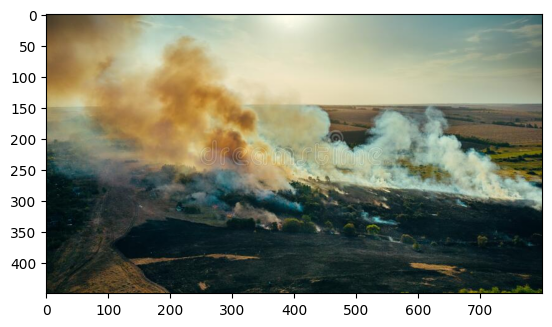

Smoke 68.48894357681274


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [4]:
img = Image.open('./test-imgs/24.jpg')
plt.imshow(img)
plt.show()

prediction, prob = predict(img)
print(prediction, prob)

## Video

In [5]:
# cap = cv2.VideoCapture('./Test-vedio/smoke.mp4')
# if not cap.isOpened():
#     print("Error opening video file")
# while True:
#     ret,image = cap.read()
#     if not ret:
#         print('no image')
#         break
#     draw = image.copy()
#     draw = cv2.resize(draw,(320,240),interpolation=cv2.INTER_AREA)
#     draw = transforms.ToPILImage()(draw)
#     prediction, prob = predict(draw)
#     if prediction == 'Neutral':
#         color = (0, 255, 0)
#     else:
#         color = (0, 0, 255)
#     cv2.putText(image, (prediction+' '+str(prob)), (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
#     cv2.imshow('framename', image)
#     if cv2.waitKey(25) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()




import cv2
from PIL import Image
import numpy as np

cap = cv2.VideoCapture('./Test-vedio/bonfire.mp4')

if not cap.isOpened():
    print("Error opening video file")

# Get the aspect ratio of the input video
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
aspect_ratio = width / height

# Calculate the new size of the output window based on the aspect ratio
new_width = 640
new_height = int(new_width / aspect_ratio)

while True:
    ret, image = cap.read()
    if not ret:
        print('no image')
        break

    # Resize the image to a fixed size
    draw = cv2.resize(image, (320, 240), interpolation=cv2.INTER_AREA)

    # Convert the image to a PIL Image
    draw = Image.fromarray(draw)

    # Perform prediction on the image
    prediction, prob = predict(draw)

    # Set the color based on the prediction
    if prediction == 'Neutral':
        color = (0, 255, 0)
    else:
        color = (0, 0, 255)

    # Draw the prediction text on the original image
    cv2.putText(image, (prediction+' '+str(prob)), (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    # Show the image in a window with the calculated size
    cv2.namedWindow('framename', cv2.WINDOW_NORMAL)
    cv2.resizeWindow('framename', new_width, new_height)
    cv2.imshow('framename', image)

    if cv2.waitKey(25) & 0xFFFFFFFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


no image


LIVE FOOTAGE

In [6]:
import cv2
from PIL import Image
import numpy as np

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error opening video capture")

# Get the aspect ratio of the input video
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
aspect_ratio = width / height

# Calculate the new size of the output window based on the aspect ratio
new_width = 640
new_height = int(new_width / aspect_ratio)

while True:
    ret, image = cap.read()
    if not ret:
        print('no image')
        break

    # Resize the image to a fixed size
    draw = cv2.resize(image, (320, 240), interpolation=cv2.INTER_AREA)

    # Convert the image to a PIL Image
    draw = Image.fromarray(draw)

    # Perform prediction on the image
    prediction, prob = predict(draw)

    # Set the color based on the prediction
    if prediction == 'Neutral':
        color = (0, 255, 0)
    else:
        color = (0, 0, 255)

    # Draw the prediction text on the original image
    cv2.putText(image, (prediction+' '+str(prob)), (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    # Show the image in a window with the calculated size
    cv2.namedWindow('framename', cv2.WINDOW_NORMAL)
    cv2.resizeWindow('framename', new_width, new_height)
    cv2.imshow('framename', image)

    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
